In [1]:
#load dataset
import numpy as np
import pandas as pd
dataset = pd.read_csv('term-deposit-marketing-2020.csv')

In [2]:
dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no


In [3]:
#there is a class imbalance; 37104 nonsubscribes and 2896 subscribes
dataset[dataset['y']=='yes'].shape, dataset[dataset['y']=='no'].shape


((2896, 14), (37104, 14))

In [4]:
#take a look at basic statistics
dataset.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


# Exploratory Data Analysis

## Look at counts for each feature

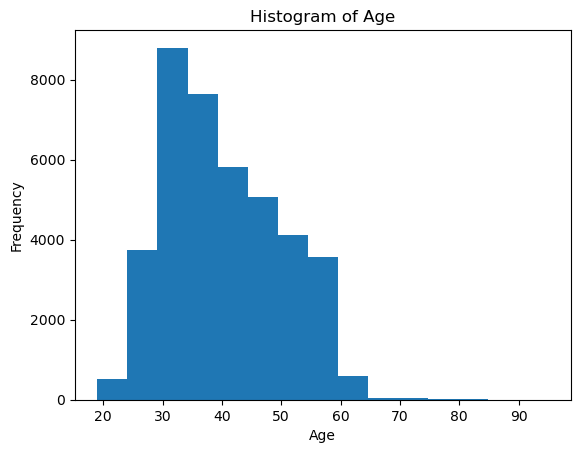

In [5]:
import matplotlib.pyplot as plt
# Create a histogram for a specific column
#bins = int(2 * (len(dataset['age'])**(1/3))) #rice rule for number of bins for age
plt.hist(dataset['age'], bins=15)

# Labeling the axes and showing the plot
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()
#here we see largest age range for customers is 30-40, and age range 40-60 is well-represented as well

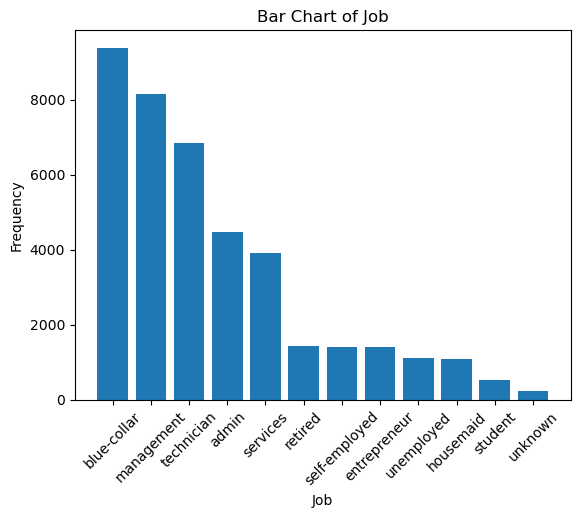

In [6]:
#bar chart for job
# Get the count of each category
category_counts = dataset['job'].value_counts()

# Create a bar chart for job
plt.bar(category_counts.index, category_counts.values)

# Labeling the axes and showing the plot
plt.xlabel('Job')
plt.ylabel('Frequency')
plt.title('Bar Chart of Job')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [7]:
#Most of the jobs represented are blue-collar, management, technician, admin, and services
#while retired, self-employed, enterpreneur, unemployed, housemaid, student are least-represented.

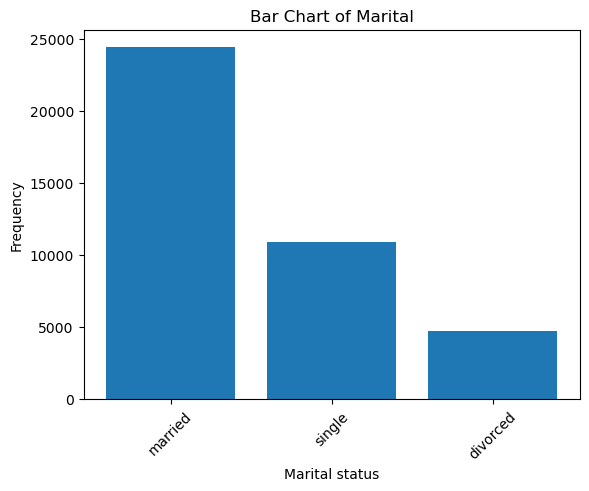

In [8]:
#bar chart for marital
# Get the count of each category
category_counts = dataset['marital'].value_counts()

# Create a bar chart for marital
plt.bar(category_counts.index, category_counts.values)

# Labeling the axes and showing the plot
plt.xlabel('Marital status')
plt.ylabel('Frequency')
plt.title('Bar Chart of Marital')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [9]:
#most of the customers are married, about half the number of married are single, and half the number of single are divorced

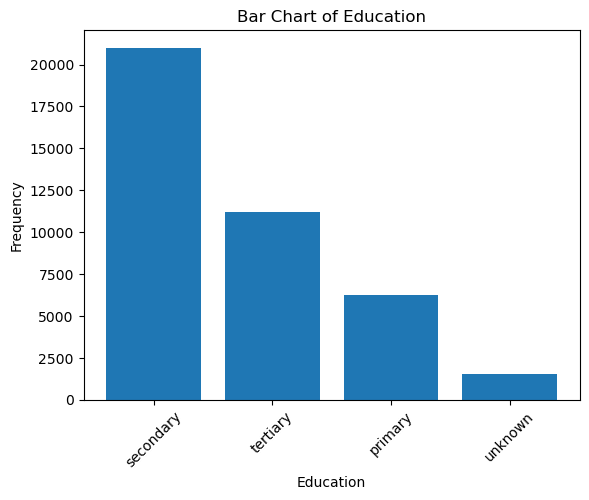

In [10]:
#bar chart for education
# Get the count of each category
category_counts = dataset['education'].value_counts()

# Create a bar chart for education
plt.bar(category_counts.index, category_counts.values)

# Labeling the axes and showing the plot
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.title('Bar Chart of Education')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [11]:
#most customers have secondary education (think high school), then tertiary (think college), then primary (think elementary school)

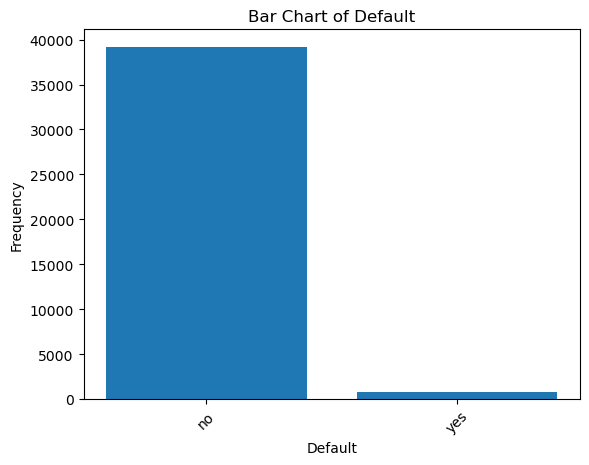

In [12]:
#bar chart for default
# Get the count of each category
category_counts = dataset['default'].value_counts()

# Create a bar chart for default
plt.bar(category_counts.index, category_counts.values)

# Labeling the axes and showing the plot
plt.xlabel('Default')
plt.ylabel('Frequency')
plt.title('Bar Chart of Default')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [13]:
#most do not have credit in default

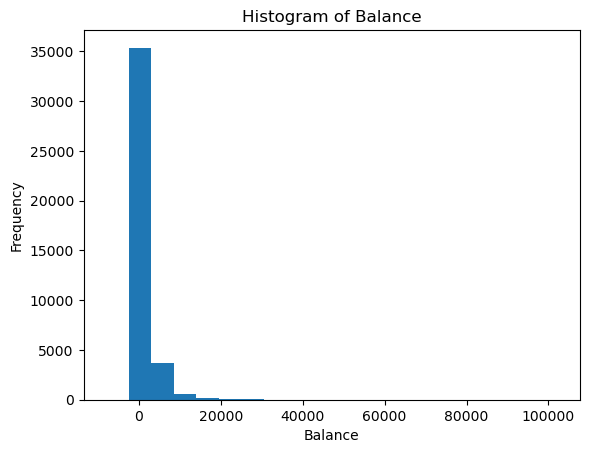

(array([9.0000e+00, 3.5354e+04, 3.7280e+03, 5.8900e+02, 1.5600e+02,
        9.0000e+01, 3.3000e+01, 1.1000e+01, 9.0000e+00, 9.0000e+00,
        3.0000e+00, 2.0000e+00, 2.0000e+00, 3.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([ -8019. ,  -2511.7,   2995.6,   8502.9,  14010.2,  19517.5,
         25024.8,  30532.1,  36039.4,  41546.7,  47054. ,  52561.3,
         58068.6,  63575.9,  69083.2,  74590.5,  80097.8,  85605.1,
         91112.4,  96619.7, 102127. ]))

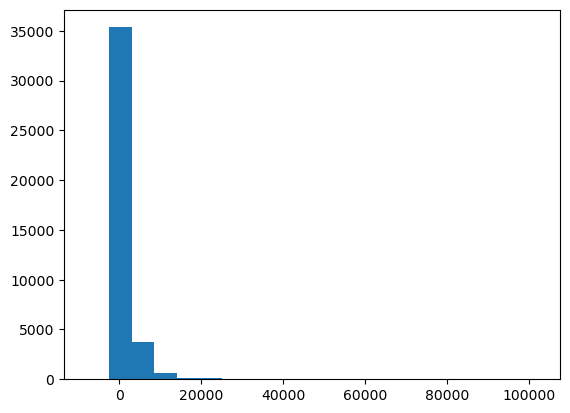

In [14]:
import matplotlib.pyplot as plt
# Create a histogram for average yearly balance
plt.hist(dataset['balance'], bins=20)

# Labeling the axes and showing the plot
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.title('Histogram of Balance')
plt.show()

counts, bin_edges, patches = plt.hist(dataset['balance'], bins=20)
counts, bin_edges

In [15]:
#most of the balances are between -2500 and 3000 euros

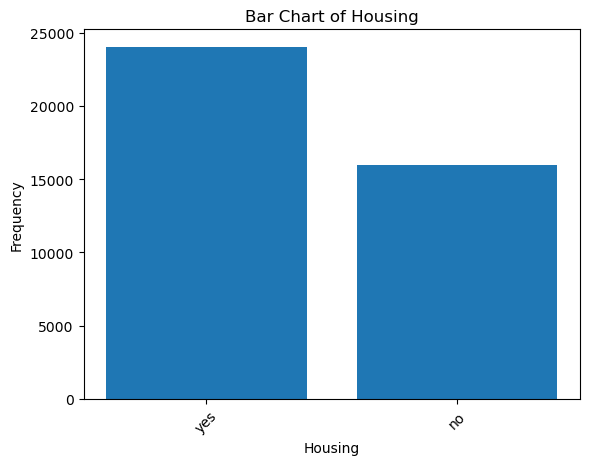

In [16]:
#bar chart for housing
# Get the count of each category
category_counts = dataset['housing'].value_counts()

# Create a bar chart for housing
plt.bar(category_counts.index, category_counts.values)

# Labeling the axes and showing the plot
plt.xlabel('Housing')
plt.ylabel('Frequency')
plt.title('Bar Chart of Housing')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [17]:
#more customers have a housing loan vs not, but the numbers are not that different

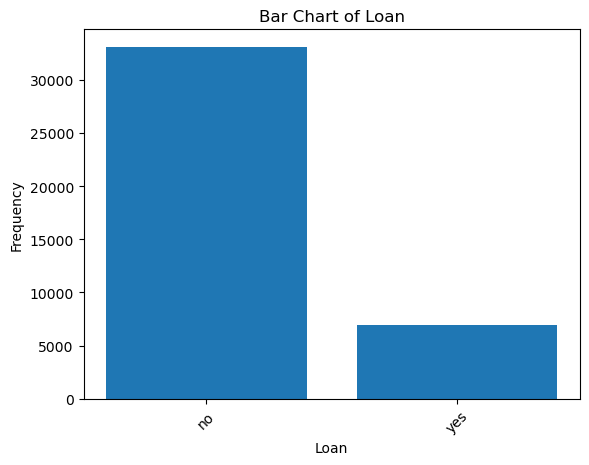

In [18]:
#bar chart for loan
# Get the count of each category
category_counts = dataset['loan'].value_counts()

# Create a bar chart for loan
plt.bar(category_counts.index, category_counts.values)

# Labeling the axes and showing the plot
plt.xlabel('Loan')
plt.ylabel('Frequency')
plt.title('Bar Chart of Loan')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [19]:
#most do not have a personal loan

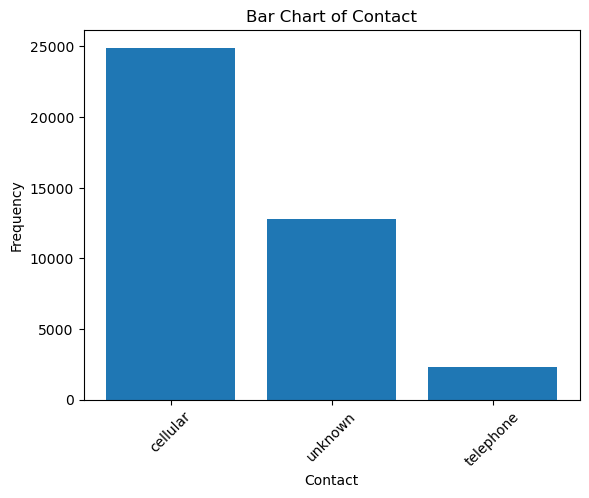

In [20]:
#bar chart for contact
# Get the count of each category
category_counts = dataset['contact'].value_counts()

# Create a bar chart for contact
plt.bar(category_counts.index, category_counts.values)

# Labeling the axes and showing the plot
plt.xlabel('Contact')
plt.ylabel('Frequency')
plt.title('Bar Chart of Contact')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [21]:
#most customers have cellular or unknown for mode of contact

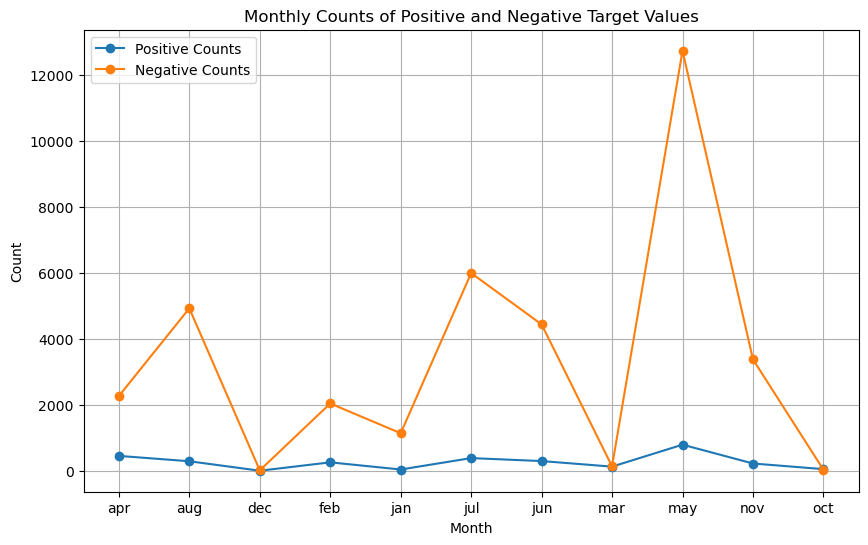

In [22]:
#Plot positive and negative counts over time (in months)
monthly_counts = dataset.groupby(['month', 'y']).size().unstack(fill_value=0)

# Create a new figure
plt.figure(figsize=(10,6))

# Plot the counts of positive and negative target values
plt.plot(monthly_counts.index, monthly_counts['yes'], label='Positive Counts', marker='o')
plt.plot(monthly_counts.index, monthly_counts['no'], label='Negative Counts', marker='o')

# Add labels and legend
plt.title('Monthly Counts of Positive and Negative Target Values')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

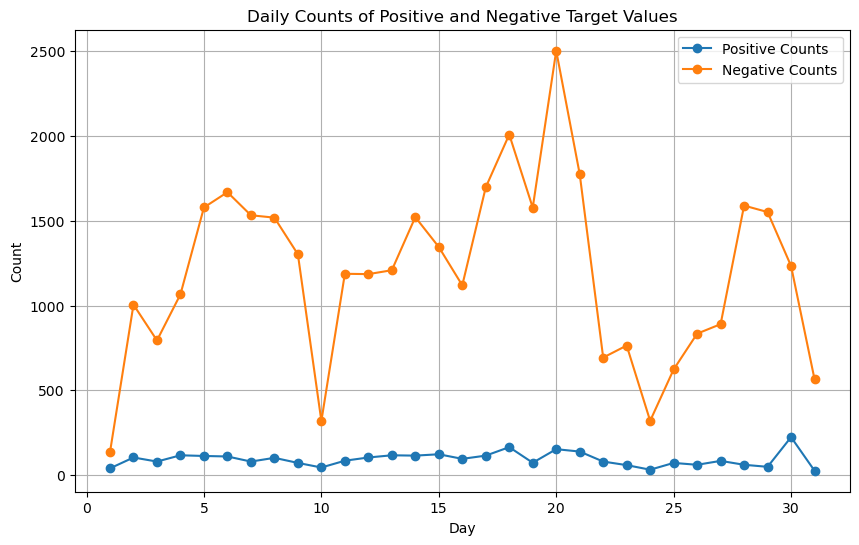

In [23]:
#Plot positive and negative counts over time (in days)
daily_counts = dataset.groupby(['day', 'y']).size().unstack(fill_value=0)

# Create a new figure
plt.figure(figsize=(10,6))

# Plot the counts of positive and negative target values
plt.plot(daily_counts.index, daily_counts['yes'], label='Positive Counts', marker='o')
plt.plot(daily_counts.index, daily_counts['no'], label='Negative Counts', marker='o')

# Add labels and legend
plt.title('Daily Counts of Positive and Negative Target Values')
plt.xlabel('Day')
plt.ylabel('Count')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

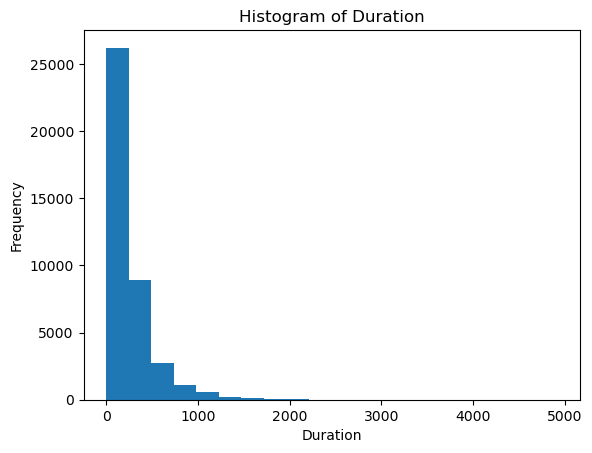

(array([2.6208e+04, 8.9290e+03, 2.7550e+03, 1.1060e+03, 5.4500e+02,
        2.3800e+02, 1.0600e+02, 5.2000e+01, 2.5000e+01, 1.2000e+01,
        7.0000e+00, 4.0000e+00, 6.0000e+00, 5.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   0. ,  245.9,  491.8,  737.7,  983.6, 1229.5, 1475.4, 1721.3,
        1967.2, 2213.1, 2459. , 2704.9, 2950.8, 3196.7, 3442.6, 3688.5,
        3934.4, 4180.3, 4426.2, 4672.1, 4918. ]))

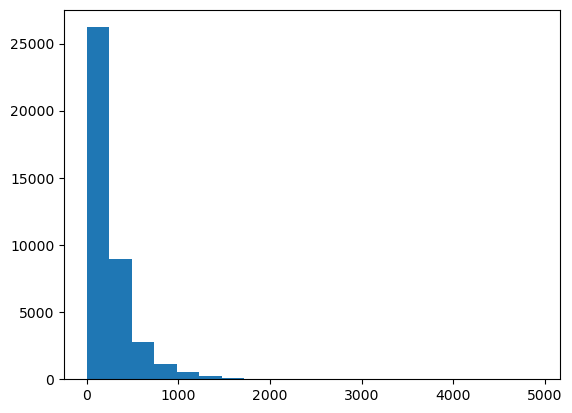

In [24]:
import matplotlib.pyplot as plt
# Create a histogram for contact duration
plt.hist(dataset['duration'], bins=20)

# Labeling the axes and showing the plot
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Histogram of Duration')
plt.show()

counts, bin_edges, patches = plt.hist(dataset['duration'], bins=20)
counts, bin_edges

In [25]:
#many of the call durations were less than 250 seconds with the second largest bin of call durations between 250 and 500 seconds

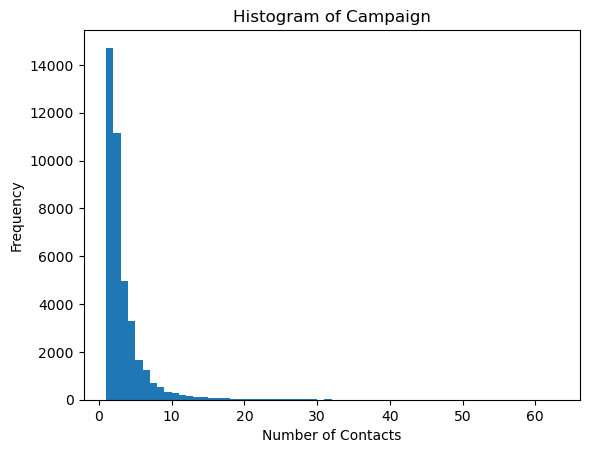

Counts: [1.4718e+04 1.1153e+04 4.9700e+03 3.2970e+03 1.6420e+03 1.2280e+03
 6.9900e+02 5.2600e+02 3.1800e+02 2.6200e+02 1.9700e+02 1.5400e+02
 1.3100e+02 9.3000e+01 8.3000e+01 7.8000e+01 6.9000e+01 5.1000e+01
 4.4000e+01 4.3000e+01 3.5000e+01 2.3000e+01 2.2000e+01 2.0000e+01
 2.2000e+01 1.3000e+01 1.0000e+01 1.6000e+01 1.6000e+01 8.0000e+00
 1.2000e+01 9.0000e+00 6.0000e+00 5.0000e+00 4.0000e+00 4.0000e+00
 2.0000e+00 3.0000e+00 1.0000e+00 0.0000e+00 2.0000e+00 0.0000e+00
 3.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 2.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 1.0000e+00]
Bin edges: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]


In [26]:
# Determine the range for your data
data_min = int(np.floor(dataset['campaign'].min()))  # floor to the nearest lower integer
data_max = int(np.ceil(dataset['campaign'].max()))   # ceil to the nearest higher integer

# Create a sequence of bin edges from data_min to data_max
bin_edges = np.arange(data_min, data_max + 1, step=1)  # step=1 for integer steps

# Create the histogram using the specified bin edges
counts, bin_edges, patches = plt.hist(dataset['campaign'], bins=bin_edges)

# Labeling the axes and showing the plot
plt.xlabel('Number of Contacts')
plt.ylabel('Frequency')
plt.title('Histogram of Campaign')
plt.show()

# Output the counts and bin edges
print('Counts:', counts)
print('Bin edges:', bin_edges)


## Look for relationships between each feature and the target

age
90-99    0.666667
70-79    0.471429
80-89    0.312500
10-19    0.166667
60-69    0.142633
20-29    0.108634
30-39    0.071850
40-49    0.061718
50-59    0.058257
0-9           NaN
Name: subscription_rate, dtype: float64


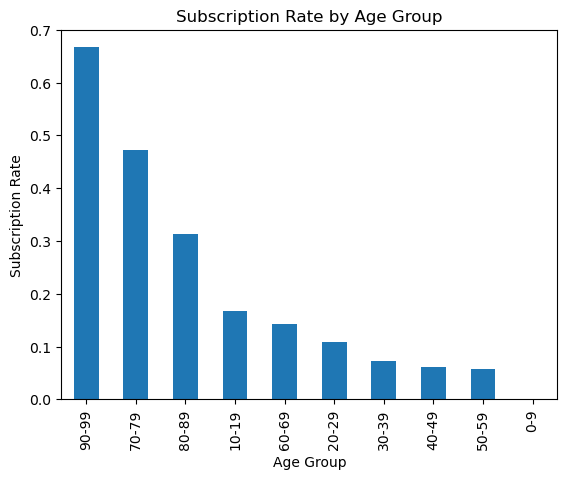

In [27]:
#compare age group with subscription rate
#first, group the ages into bins of length 10 years
dataset['age'] = pd.cut(dataset['age'], bins=range(0, 101, 10), right=False, labels=[f'{i}-{i+9}' for i in range(0, 100, 10)])

# Group by age_group and subscribed, then calculate the size of each group
age_counts = dataset.groupby(['age', 'y']).size().unstack(fill_value=0)

# Calculate subscription rate for each age group
age_counts['subscription_rate'] = age_counts['yes'] / (age_counts['no'] + age_counts['yes'])

# Sort age groups by subscription rate for better visualization
sorted_age_counts = age_counts.sort_values(by='subscription_rate', ascending=False)

# Print or plot the subscription rate
print(sorted_age_counts['subscription_rate'])

# Plot the subscription rates
sorted_age_counts['subscription_rate'].plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.title('Subscription Rate by Age Group')
plt.show()


In [28]:
#although people aged over 80 tend to have a higher subscription rate, their numbers are low;
#so, the more promising age groups are 60-69, 20-29, 30-39, 40-49, and 50-59
age_counts

y,no,yes,subscription_rate
age,,,
0-9,0,0,NaN
10-19,10,2,0.166667
20-29,3799,463,0.108634
30-39,15256,1181,0.071850
40-49,10201,671,0.061718
50-59,7242,448,0.058257
60-69,547,91,0.142633
70-79,37,33,0.471429
80-89,11,5,0.312500


job
student          0.156489
retired          0.105080
unemployed       0.086957
management       0.082782
self-employed    0.079208
admin            0.078296
technician       0.072534
unknown          0.072340
entrepreneur     0.062633
services         0.060870
blue-collar      0.057018
housemaid        0.048758
Name: subscription_rate, dtype: float64


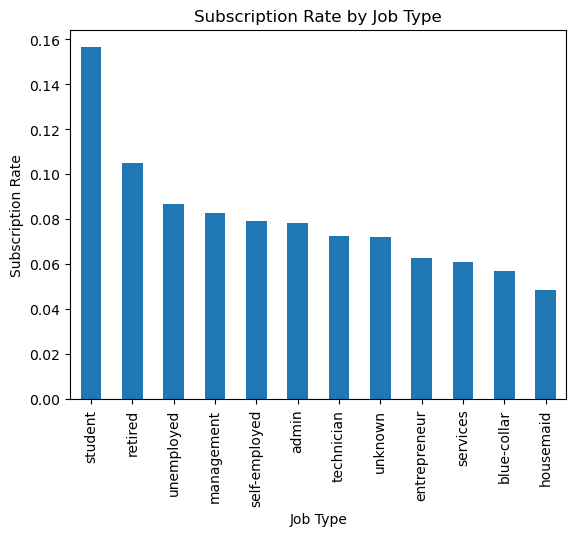

In [29]:
#compare job type with subscribe
job_counts = dataset.groupby(['job', 'y']).size().unstack(fill_value=0)
job_counts['subscription_rate'] = job_counts['yes'] / (job_counts['no'] + job_counts['yes'])

# Sort job types by subscription rate for better visualization
sorted_job_counts = job_counts.sort_values(by='subscription_rate', ascending=False)

# Now you can print or plot the subscription rate
print(sorted_job_counts['subscription_rate'])

# Or plot the subscription rates
sorted_job_counts['subscription_rate'].plot(kind='bar')
plt.xlabel('Job Type')
plt.ylabel('Subscription Rate')
plt.title('Subscription Rate by Job Type')
plt.show()


In [30]:
#the job types with highest subscription rate are student, retired, unemployed, etc.

marital
single      0.094315
divorced    0.082751
married     0.060609
Name: subscription_rate, dtype: float64


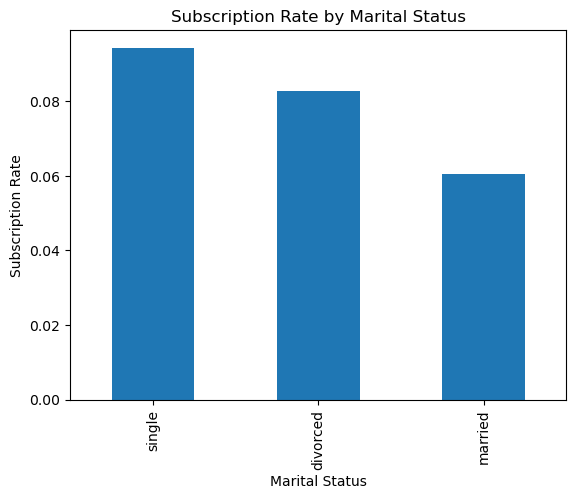

In [31]:
#compare marital status with subscribe
marital_counts = dataset.groupby(['marital', 'y']).size().unstack(fill_value=0)
marital_counts['subscription_rate'] = marital_counts['yes'] / (marital_counts['no'] + marital_counts['yes'])

# Sort marital types by subscription rate for better visualization
sorted_marital_counts = marital_counts.sort_values(by='subscription_rate', ascending=False)

# Now you can print or plot the subscription rate
print(sorted_marital_counts['subscription_rate'])

# Or plot the subscription rates
sorted_marital_counts['subscription_rate'].plot(kind='bar')
plt.xlabel('Marital Status')
plt.ylabel('Subscription Rate')
plt.title('Subscription Rate by Marital Status')
plt.show()


In [32]:
#the subscription rate doesn't seem to differ much between the marital statuses

education
tertiary     0.091826
secondary    0.067546
unknown      0.062704
primary      0.056300
Name: subscription_rate, dtype: float64


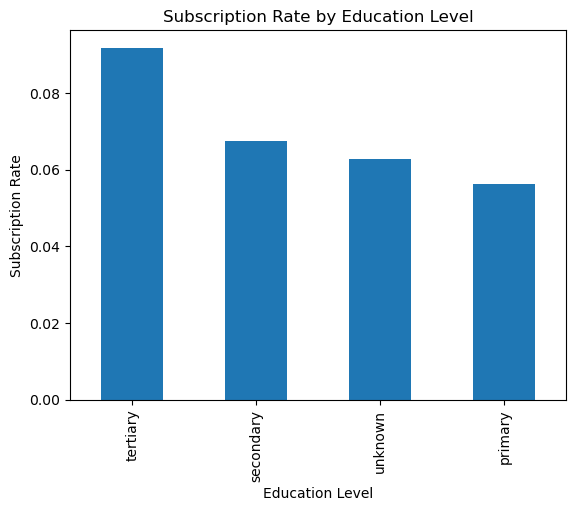

In [33]:
#compare education level with subscribe
education_counts = dataset.groupby(['education', 'y']).size().unstack(fill_value=0)
education_counts['subscription_rate'] = education_counts['yes'] / (education_counts['no'] + education_counts['yes'])

# Sort education levels by subscription rate for better visualization
sorted_education_counts = education_counts.sort_values(by='subscription_rate', ascending=False)

# Now you can print or plot the subscription rate
print(sorted_education_counts['subscription_rate'])

# Or plot the subscription rates
sorted_education_counts['subscription_rate'].plot(kind='bar')
plt.xlabel('Education Level')
plt.ylabel('Subscription Rate')
plt.title('Subscription Rate by Education Level')
plt.show()


In [34]:
#the education level doesn't seem to matter much in regards to subscription rate

default
no     0.072644
yes    0.060569
Name: subscription_rate, dtype: float64


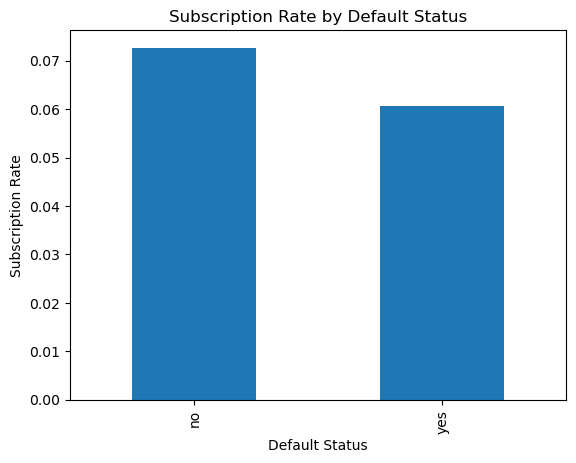

In [35]:
#compare default with subscribe
default_counts = dataset.groupby(['default', 'y']).size().unstack(fill_value=0)
default_counts['subscription_rate'] = default_counts['yes'] / (default_counts['no'] + default_counts['yes'])

# Sort default types by subscription rate for better visualization
sorted_default_counts = default_counts.sort_values(by='subscription_rate', ascending=False)

# Now you can print or plot the subscription rate
print(sorted_default_counts['subscription_rate'])

# Or plot the subscription rates
sorted_default_counts['subscription_rate'].plot(kind='bar')
plt.xlabel('Default Status')
plt.ylabel('Subscription Rate')
plt.title('Subscription Rate by Default Status')
plt.show()


In [36]:
#default status doesn't seem to matter

balance
32000-36999     0.230769
-8000--3001     0.200000
42000-46999     0.142857
7000-11999      0.098837
2000-6999       0.098043
12000-16999     0.084337
22000-26999     0.083333
17000-21999     0.077670
-3000-1999      0.067133
27000-31999     0.055556
37000-41999     0.000000
47000-51999     0.000000
52000-56999     0.000000
57000-61999     0.000000
62000-66999     0.000000
97000-101999    0.000000
67000-71999          NaN
72000-76999          NaN
77000-81999          NaN
82000-86999          NaN
87000-91999          NaN
92000-96999          NaN
Name: subscription_rate, dtype: float64


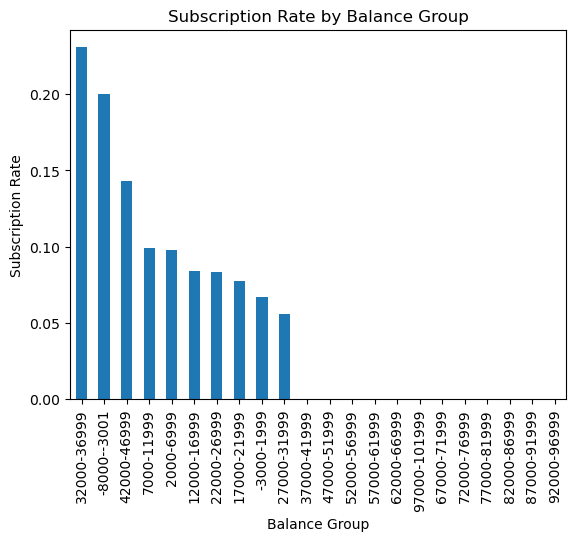

In [37]:
#compare balance with subscription rate

# Binning the balance column in intervals of 5000
# Create bins
bins = range(-8000, 103000, 5000)

# Generate labels based on bins
labels = [f'{i}-{i+4999}' for i in bins[:-1]]  # Exclude the last bin edge

# Apply pd.cut()
dataset['balance'] = pd.cut(dataset['balance'], bins=bins, right=False, labels=labels)

# Group by balance group and subscribed, then calculate the size of each group
balance_counts = dataset.groupby(['balance', 'y']).size().unstack(fill_value=0)

# Calculate subscription rate for each balance group
balance_counts['subscription_rate'] = balance_counts['yes'] / (balance_counts['no'] + balance_counts['yes'])

# Sort balance groups by subscription rate for better visualization
sorted_balance_counts = balance_counts.sort_values(by='subscription_rate', ascending=False)

# Print or plot the subscription rate
print(sorted_balance_counts['subscription_rate'])

# Plot the subscription rates
sorted_balance_counts['subscription_rate'].plot(kind='bar')
plt.xlabel('Balance Group')
plt.ylabel('Subscription Rate')
plt.title('Subscription Rate by Balance Group')
plt.show()


In [38]:
sorted_balance_counts

y,no,yes,subscription_rate
balance,,,
32000-36999,10,3,0.230769
-8000--3001,4,1,0.200000
42000-46999,6,1,0.142857
7000-11999,775,85,0.098837
2000-6999,5115,556,0.098043
12000-16999,228,21,0.084337
22000-26999,55,5,0.083333
17000-21999,95,8,0.077670
-3000-1999,30779,2215,0.067133


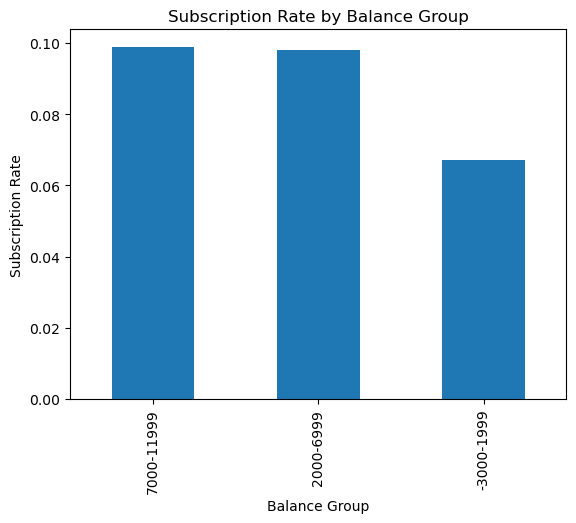

In [39]:
#As you can see,not all balance ranges have large counts;
#We only want to consider ranges with enough counts
#As you can see, the balance groups with highest subscription rates are
#7000-12000, 2000-7000, and -3000-2000.

# Filter the DataFrame to only include rows where the sum of 'no' and 'yes' is greater than 1000
filtered_balance_counts = sorted_balance_counts[(sorted_balance_counts['no'] + sorted_balance_counts['yes']) > 500]

# Plot the filtered subscription rates
filtered_balance_counts['subscription_rate'].plot(kind='bar')
plt.xlabel('Balance Group')
plt.ylabel('Subscription Rate')
plt.title('Subscription Rate by Balance Group')
plt.show()


housing
no     0.089674
yes    0.060921
Name: subscription_rate, dtype: float64


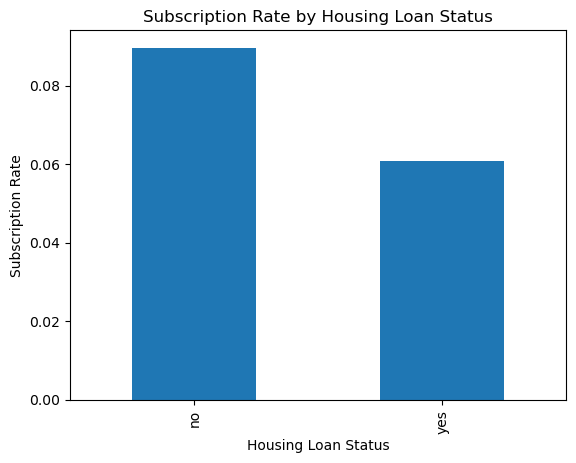

In [40]:
#compare housing loan with subscribe
housing_counts = dataset.groupby(['housing', 'y']).size().unstack(fill_value=0)
housing_counts['subscription_rate'] = housing_counts['yes'] / (housing_counts['no'] + housing_counts['yes'])

# Sort housing types by subscription rate for better visualization
sorted_housing_counts = housing_counts.sort_values(by='subscription_rate', ascending=False)

# Now you can print or plot the subscription rate
print(sorted_housing_counts['subscription_rate'])

# Or plot the subscription rates
sorted_housing_counts['subscription_rate'].plot(kind='bar')
plt.xlabel('Housing Loan Status')
plt.ylabel('Subscription Rate')
plt.title('Subscription Rate by Housing Loan Status')
plt.show()


In [41]:
sorted_housing_counts

y,no,yes,subscription_rate
housing,,,
no,14537,1432,0.089674
yes,22567,1464,0.060921


In [42]:
#The housing loan status doesn't seem to make a big difference

loan
no     0.076081
yes    0.054834
Name: subscription_rate, dtype: float64


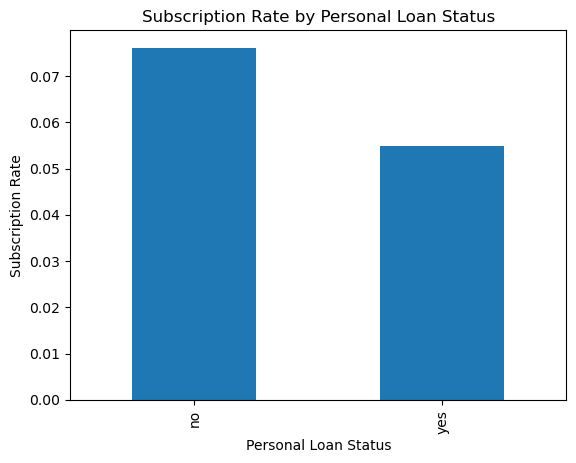

In [43]:
#compare personal loan status with subscribe
loan_counts = dataset.groupby(['loan', 'y']).size().unstack(fill_value=0)
loan_counts['subscription_rate'] = loan_counts['yes'] / (loan_counts['no'] + loan_counts['yes'])

# Sort loan status types by subscription rate for better visualization
sorted_loan_counts = loan_counts.sort_values(by='subscription_rate', ascending=False)

# Now you can print or plot the subscription rate
print(sorted_loan_counts['subscription_rate'])

# Or plot the subscription rates
sorted_loan_counts['subscription_rate'].plot(kind='bar')
plt.xlabel('Personal Loan Status')
plt.ylabel('Subscription Rate')
plt.title('Subscription Rate by Personal Loan Status')
plt.show()


In [44]:
#there isn't a huge difference between personal loan status types

contact
cellular     0.089628
telephone    0.071521
unknown      0.038935
Name: subscription_rate, dtype: float64


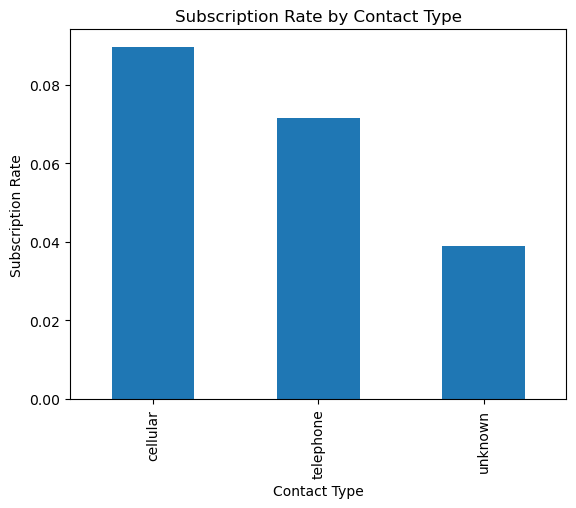

In [45]:
#compare contact type level with subscribe
contact_counts = dataset.groupby(['contact', 'y']).size().unstack(fill_value=0)
contact_counts['subscription_rate'] = contact_counts['yes'] / (contact_counts['no'] + contact_counts['yes'])

# Sort contact types by subscription rate for better visualization
sorted_contact_counts = contact_counts.sort_values(by='subscription_rate', ascending=False)

# Now you can print or plot the subscription rate
print(sorted_contact_counts['subscription_rate'])

# Or plot the subscription rates
sorted_contact_counts['subscription_rate'].plot(kind='bar')
plt.xlabel('Contact Type')
plt.ylabel('Subscription Rate')
plt.title('Subscription Rate by Contact Type')
plt.show()


In [46]:
#cellular is the best contact type, with telephone being second best

month
oct    0.612500
mar    0.484496
apr    0.165931
feb    0.111063
dec    0.076923
jun    0.062104
nov    0.061145
jul    0.060188
may    0.058454
aug    0.055225
jan    0.032313
Name: subscription_rate, dtype: float64


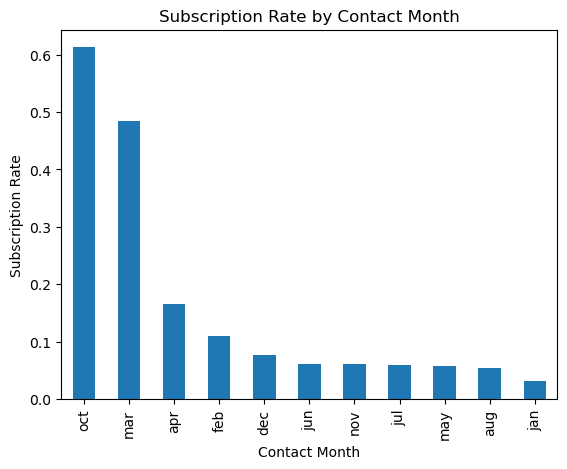

In [47]:
#compare last contact month with subscribe
month_counts = dataset.groupby(['month', 'y']).size().unstack(fill_value=0)
month_counts['subscription_rate'] = month_counts['yes'] / (month_counts['no'] + month_counts['yes'])

# Sort contact month by subscription rate for better visualization
sorted_month_counts = month_counts.sort_values(by='subscription_rate', ascending=False)

# Now you can print or plot the subscription rate
print(sorted_month_counts['subscription_rate'])

# Or plot the subscription rates
sorted_month_counts['subscription_rate'].plot(kind='bar')
plt.xlabel('Contact Month')
plt.ylabel('Subscription Rate')
plt.title('Subscription Rate by Contact Month')
plt.show()


In [48]:
sorted_month_counts

y,no,yes,subscription_rate
month,,,
oct,31,49,0.612500
mar,133,125,0.484496
apr,2267,451,0.165931
feb,2041,255,0.111063
dec,12,1,0.076923
jun,4440,294,0.062104
nov,3378,220,0.061145
jul,5996,384,0.060188
may,12741,791,0.058454


In [49]:
#the best months to contact are oct, mar, apr.

day
1     0.227273
30    0.153741
10    0.123626
25    0.103597
22    0.103493
4     0.098901
2     0.093778
3     0.091533
24    0.090909
13    0.088302
27    0.086242
15    0.083787
12    0.080683
16    0.079012
18    0.075932
21    0.072623
23    0.071689
14    0.070293
26    0.068156
5     0.066824
11    0.066824
17    0.063466
8     0.062963
6     0.061867
20    0.057627
9     0.052402
7     0.049628
19    0.044242
31    0.043993
28    0.036970
29    0.030625
Name: subscription_rate, dtype: float64


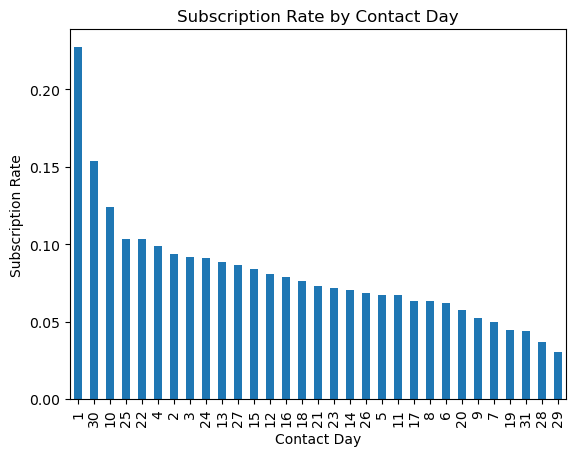

In [50]:
#compare last contact day with subscribe
day_counts = dataset.groupby(['day', 'y']).size().unstack(fill_value=0)
day_counts['subscription_rate'] = day_counts['yes'] / (day_counts['no'] + day_counts['yes'])

# Sort contact day by subscription rate for better visualization
sorted_day_counts = day_counts.sort_values(by='subscription_rate', ascending=False)

# Now you can print or plot the subscription rate
print(sorted_day_counts['subscription_rate'])

# Or plot the subscription rates
sorted_day_counts['subscription_rate'].plot(kind='bar')
plt.xlabel('Contact Day')
plt.ylabel('Subscription Rate')
plt.title('Subscription Rate by Contact Day')
plt.show()


In [51]:
sorted_day_counts

y,no,yes,subscription_rate
day,,,
1,136,40,0.227273
30,1233,224,0.153741
10,319,45,0.123626
25,623,72,0.103597
22,693,80,0.103493
4,1066,117,0.098901
2,1005,104,0.093778
3,794,80,0.091533
24,320,32,0.090909


In [52]:
#the best days to contact seem to the either the first of the month of the last of the month

duration
3750-3999    1.000000
2500-2749    0.800000
2750-2999    0.750000
1500-1749    0.704082
3000-3249    0.666667
1250-1499    0.613333
1000-1249    0.576779
1750-1999    0.566038
2250-2499    0.545455
2000-2249    0.473684
750-999      0.472846
500-749      0.278761
3250-3499    0.200000
250-499      0.067344
0-249        0.017813
4750-4999    0.000000
3500-3749         NaN
4000-4249         NaN
4250-4499         NaN
4500-4749         NaN
Name: subscription_rate, dtype: float64


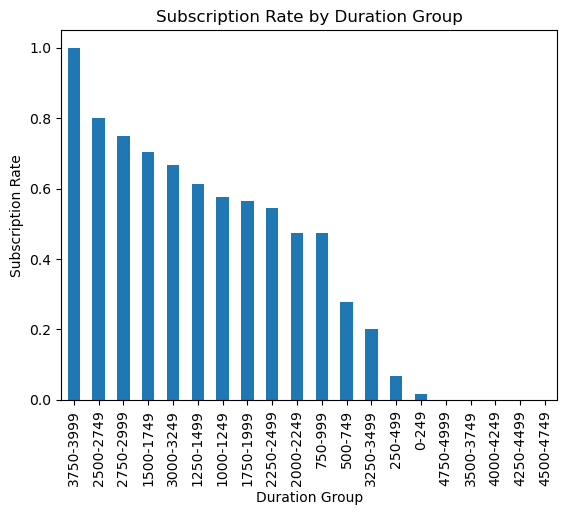

In [53]:
#compare contact duration to subscription rate

# Define bin edges using range, starting at 0 and ending at 5000 with a step of 250
bin_edges = range(0, 5000 + 1, 250)  # +1 to include the max value of 4918

# Create labels for these bins
labels = [f'{i}-{i+249}' for i in bin_edges[:-1]]  # Exclude the last bin edge

# Bin the data using pd.cut
dataset['duration'] = pd.cut(dataset['duration'], bins=bin_edges, labels=labels, right=False)

# Group by duration group and subscribed, then calculate the size of each group
duration_counts = dataset.groupby(['duration', 'y']).size().unstack(fill_value=0)

# Calculate subscription rate for each duration group
duration_counts['subscription_rate'] = duration_counts['yes'] / (duration_counts['no'] + duration_counts['yes'])

# Sort duration groups by subscription rate for better visualization
sorted_duration_counts = duration_counts.sort_values(by='subscription_rate', ascending=False)

# Print or plot the subscription rate
print(sorted_duration_counts['subscription_rate'])

# Plot the subscription rates
sorted_duration_counts['subscription_rate'].plot(kind='bar')
plt.xlabel('Duration Group')
plt.ylabel('Subscription Rate')
plt.title('Subscription Rate by Duration Group')
plt.show()

In [54]:
#if we take a look at only the cases where there are at least 100 subscriptions,
#the best duration ranges between 0 to 1500 seconds with higher conversion rates 
#for 500-1250 seconds
sorted_duration_counts[sorted_duration_counts['yes']>100]


y,no,yes,subscription_rate
duration,,,
1250-1499,87,138,0.613333
1000-1249,226,308,0.576779
750-999,563,505,0.472846
500-749,1956,756,0.278761
250-499,8171,590,0.067344
0-249,26025,472,0.017813


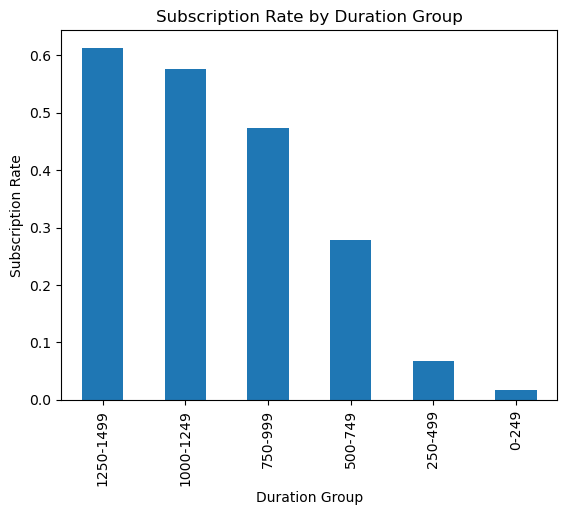

In [55]:
import pandas as pd
import matplotlib.pyplot as plt



# Filter the DataFrame to only include rows where 'yes' is at least 100
filtered_duration_counts = sorted_duration_counts[sorted_duration_counts['yes'] >= 100]

# Plot the filtered subscription rates
filtered_duration_counts['subscription_rate'].plot(kind='bar')
plt.xlabel('Duration Group')
plt.ylabel('Subscription Rate')
plt.title('Subscription Rate by Duration Group')
plt.show()


campaign
0-2      0.078234
3-5      0.067514
9-11     0.056628
6-8      0.052181
15-17    0.052174
12-14    0.037037
30-32    0.034483
27-29    0.023810
24-26    0.018182
21-23    0.012500
18-20    0.007246
Name: subscription_rate, dtype: float64


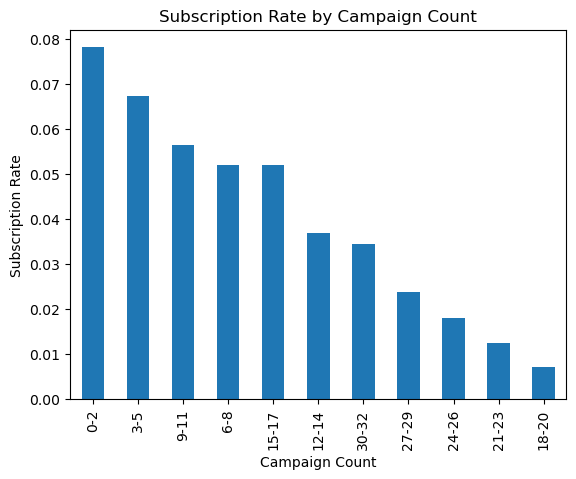

In [56]:
#compare campaign count with subscribe

# Define bin edges using range, starting at 0 and ending at 35 with a step of 3
bin_edges = range(0, 35 + 1, 3)

# Create labels for these bins
labels = [f'{i}-{i+2}' for i in bin_edges[:-1]]  # Exclude the last bin edge

# Bin the data using pd.cut
dataset['campaign'] = pd.cut(dataset['campaign'], bins=bin_edges, labels=labels, right=False)

campaign_counts = dataset.groupby(['campaign', 'y']).size().unstack(fill_value=0)
campaign_counts['subscription_rate'] = campaign_counts['yes'] / (campaign_counts['no'] + campaign_counts['yes'])

# Sort contact day by subscription rate for better visualization
sorted_campaign_counts = campaign_counts.sort_values(by='subscription_rate', ascending=False)

# Now you can print or plot the subscription rate
print(sorted_campaign_counts['subscription_rate'])

# Or plot the subscription rates
sorted_campaign_counts['subscription_rate'].plot(kind='bar')
plt.xlabel('Campaign Count')
plt.ylabel('Subscription Rate')
plt.title('Subscription Rate by Campaign Count')
plt.show()


In [57]:
#The more contacts made, the less successful for subscription; so less contacts made is better

# Machine Learning: Classification Models

## Data Preprocessing

In [58]:
dataset = pd.read_csv('term-deposit-marketing-2020.csv')
#I have three binary features default, housing, and loan.  I will convert these into 0's and 1's
#I will also convert the 'y' column into 0's and 1's
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dataset['default'] = le.fit_transform(dataset['default'])  # Assumes values are 'yes' and 'no'
dataset['housing'] = le.fit_transform(dataset['housing']) 
dataset['loan'] = le.fit_transform(dataset['loan']) 
dataset['y'] = le.fit_transform(dataset['y']) 

#there are several categorical features: job, marital, education, contact, month
#I will one-hot encode 'job', 'marital', 'education', 'contact'

dataset_encoded = pd.get_dummies(dataset, columns=['job'], prefix='job')
dataset_encoded = pd.get_dummies(dataset_encoded, columns=['marital'], prefix='marital')
dataset_encoded = pd.get_dummies(dataset_encoded, columns=['education'], prefix='education')
dataset_encoded = pd.get_dummies(dataset_encoded, columns=['contact'], prefix='contact')
#dataset_encoded = pd.get_dummies(dataset_encoded, columns=['month'], prefix='month')

#for month, just convert to numbers between 1 and 12
month_dict = {
    'jan': 1, 'feb': 2, 'mar': 3,
    'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9,
    'oct': 10, 'nov': 11, 'dec': 12
}
dataset_encoded['month'] = dataset['month'].str.lower().replace(month_dict)


In [59]:
dataset_encoded

,age,default,balance,housing,loan,day,month,duration,campaign,y,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown
0,58,0,2143,1,0,5,5,261,1,0,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,5,151,1,0,...,0,0,1,0,1,0,0,0,0,1
2,33,0,2,1,1,5,5,76,1,0,...,0,1,0,0,1,0,0,0,0,1
3,47,0,1506,1,0,5,5,92,1,0,...,0,1,0,0,0,0,1,0,0,1
4,33,0,1,0,0,5,5,198,1,0,...,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,0,395,0,0,3,6,107,1,0,...,0,1,0,0,0,1,0,1,0,0
39996,30,0,3340,0,0,3,6,238,3,1,...,0,0,1,0,0,1,0,1,0,0
39997,54,0,200,0,0,3,6,170,1,1,...,1,0,0,0,1,0,0,1,0,0
39998,34,0,1047,0,0,3,6,342,1,0,...,0,1,0,0,0,1,0,1,0,0


## Build, Apply, and Assess Models

In [60]:
#Perform logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import cross_val_score

#Define X and Y using dataset
X = dataset_encoded.drop(columns=['y']).values
Y = dataset_encoded['y'].values

#Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 2)

#Feature Scaling
column_names=dataset_encoded.drop(columns=['y']).columns
X_train = pd.DataFrame(X_train, columns=column_names)
X_test = pd.DataFrame(X_test, columns=column_names)
from sklearn.preprocessing import StandardScaler

# Define columns to scale
columns_to_scale = ['age', 'balance', 'duration']

# Create the scaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform both training and test data
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

X_train=X_train.values
X_test=X_test.values


#Fitting Logistic Regression to the Training set
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train,Y_train)

# #Predicting the Test set results
# Y_pred = classifier.predict(X_test)

# #Making the confusion matrix
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(Y_test, Y_pred)
# print(f'accuracy:{cm.trace()/len(Y_test)}')
# print(f'confusion matrix:\n{cm}')

# Perform 5-fold cross-validation
cv_scores = cross_val_score(classifier, X_train, Y_train, cv=5)

# The cv_scores array will contain the accuracy for each fold
mean_cv_score = cv_scores.mean()

# Output the mean accuracy across the 5 folds
print(f'Mean CV Accuracy: {mean_cv_score * 100:.2f}%')

#Predicting the Test set results
Y_pred = classifier.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

#Although the accuracy is very high,
#the precision, recall, and f1-score are high for class 0 but low for class 1.  This is not good.  We want high scores for both.
# Recall for minority class is how many of the subscribers the model correctly identifies out of all the subscribers.
#Precision for minority, on the other hand, is how many of the model's predictions of subscriber are correct.
#We want to maximize both precision and recall since we don't want to count someone as a subscriber when they're not;
#this could be a waste of effort to try and convert them
#Secondly, we don't want to skip someone if they are a subscriber since those are the people we want to target;
#if customers who are potential subscribers are rare or difficult to find,
#it may suggest that recall is more important than precision

Mean CV Accuracy: 93.31%
accuracy:0.935125
confusion matrix:
[[7353  103]
 [ 416  128]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7456
           1       0.55      0.24      0.33       544

    accuracy                           0.94      8000
   macro avg       0.75      0.61      0.65      8000
weighted avg       0.92      0.94      0.92      8000



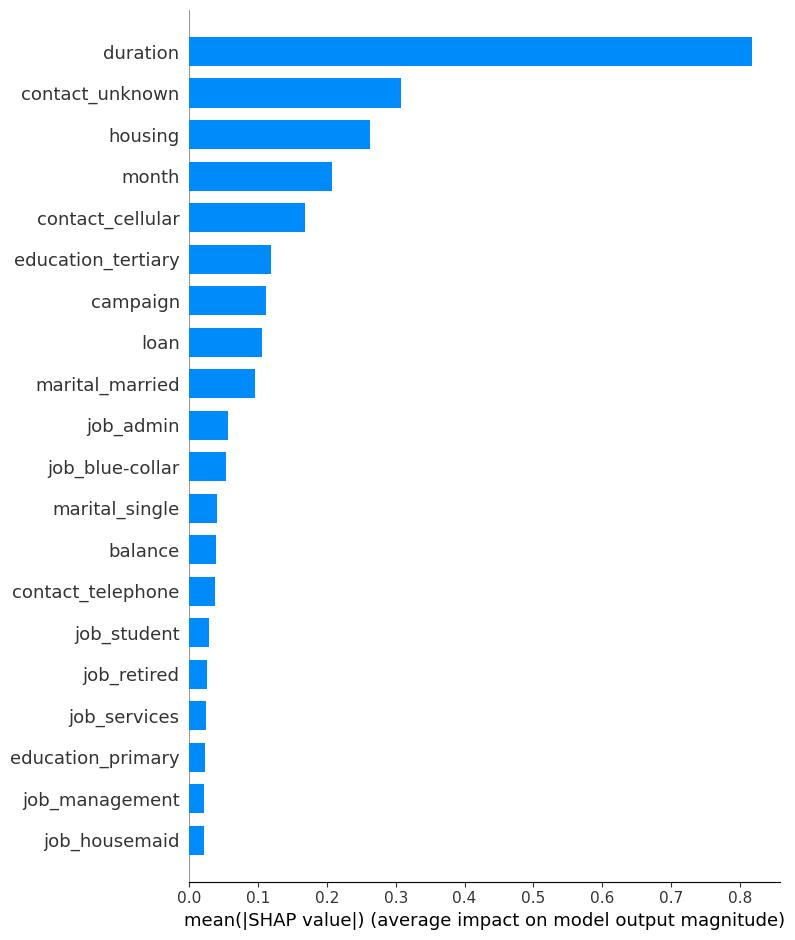

In [61]:
import shap

# Convert to DataFrames with column names
X_train = pd.DataFrame(X_train, columns=dataset_encoded.drop(columns=['y']).columns)
X_test = pd.DataFrame(X_test, columns=dataset_encoded.drop(columns=['y']).columns)
# create the explainer
explainer = shap.LinearExplainer(classifier, X_train)

# compute SHAP values
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type='bar')

In [62]:
#To overcome the imbalanced data issue, we can apply oversampling and undersampling
!pip install -U imbalanced-learn


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [63]:
import imblearn
# Oversampling and under sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

In [64]:
#Oversampling
#convert X_train, X_test back to np arrays
X_train=X_train.values
X_test=X_test.values
# Randomly over-sample the minority class
ros = RandomOverSampler(random_state=42, sampling_strategy='minority')
X_train_ros, Y_train_ros= ros.fit_resample(X_train, Y_train)
# Check the number of records after over sampling
print(sorted(Counter(Y_train_ros).items()))

[(0, 29648), (1, 29648)]


In [65]:
#There are 29648 nonsubscribers in Y_train; after oversampling, we now have 29648 in each of the
# two classes--subscriber and nonsubscriber.


In [66]:
#Fitting Logistic Regression to the randomly over-sampled Training set
classifier_ros = LogisticRegression(max_iter=1000)
classifier_ros.fit(X_train_ros,Y_train_ros)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(classifier_ros, X_train_ros, Y_train_ros, cv=5)

# The cv_scores array will contain the accuracy for each fold
mean_cv_score = cv_scores.mean()

# Output the mean accuracy across the 5 folds
print(f'Mean CV Accuracy: {mean_cv_score * 100:.2f}%')

#Predicting the Test set results
Y_pred_ros = classifier_ros.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_ros)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred_ros))


Mean CV Accuracy: 83.18%
accuracy:0.85275
confusion matrix:
[[6391 1065]
 [ 113  431]]
              precision    recall  f1-score   support

           0       0.98      0.86      0.92      7456
           1       0.29      0.79      0.42       544

    accuracy                           0.85      8000
   macro avg       0.64      0.82      0.67      8000
weighted avg       0.94      0.85      0.88      8000



In [67]:
#the recall greatly improved but precision went down; the accuracy is about 87%

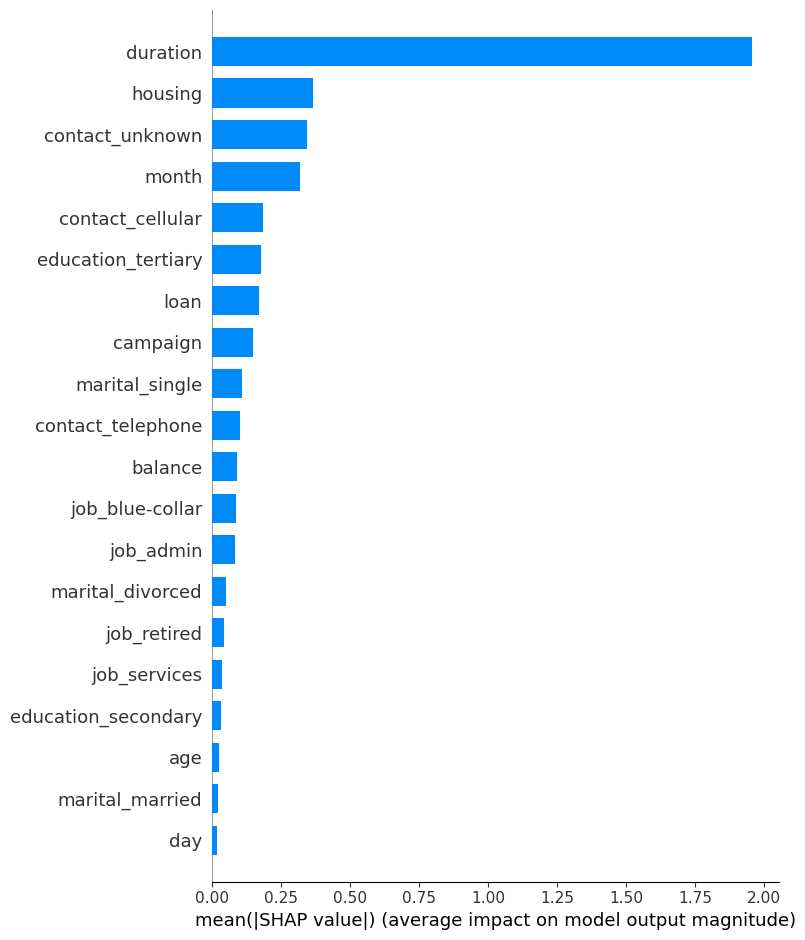

In [68]:
import shap
# Convert to DataFrames with column names
X_train_ros = pd.DataFrame(X_train_ros, columns=dataset_encoded.drop(columns=['y']).columns)
X_test = pd.DataFrame(X_test, columns=dataset_encoded.drop(columns=['y']).columns)
# create the explainer
explainer = shap.LinearExplainer(classifier_ros, X_train_ros)

# compute SHAP values
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type='bar')

In [69]:
#Perform Random Forest with oversampling
#convert X_train, X_test back to np arrays
X_train_ros=X_train_ros.values
X_test=X_test.values
#Fitting random forest classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=0)
classifier.fit(X_train_ros,Y_train_ros)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(classifier, X_train_ros, Y_train_ros, cv=5)

# The cv_scores array will contain the accuracy for each fold
mean_cv_score = cv_scores.mean()

# Output the mean accuracy across the 5 folds
print(f'Mean CV Accuracy: {mean_cv_score * 100:.2f}%')

#Predicting the Test set results
Y_pred_rf = classifier.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_rf)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,Y_pred_rf)}')

Mean CV Accuracy: 98.18%
accuracy:0.935375
confusion matrix:
[[7242  214]
 [ 303  241]]
classification report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      7456
           1       0.53      0.44      0.48       544

    accuracy                           0.94      8000
   macro avg       0.74      0.71      0.72      8000
weighted avg       0.93      0.94      0.93      8000



In [70]:
#precision improved, but recall went down

100%|===================| 1596/1600 [00:54<00:00]        

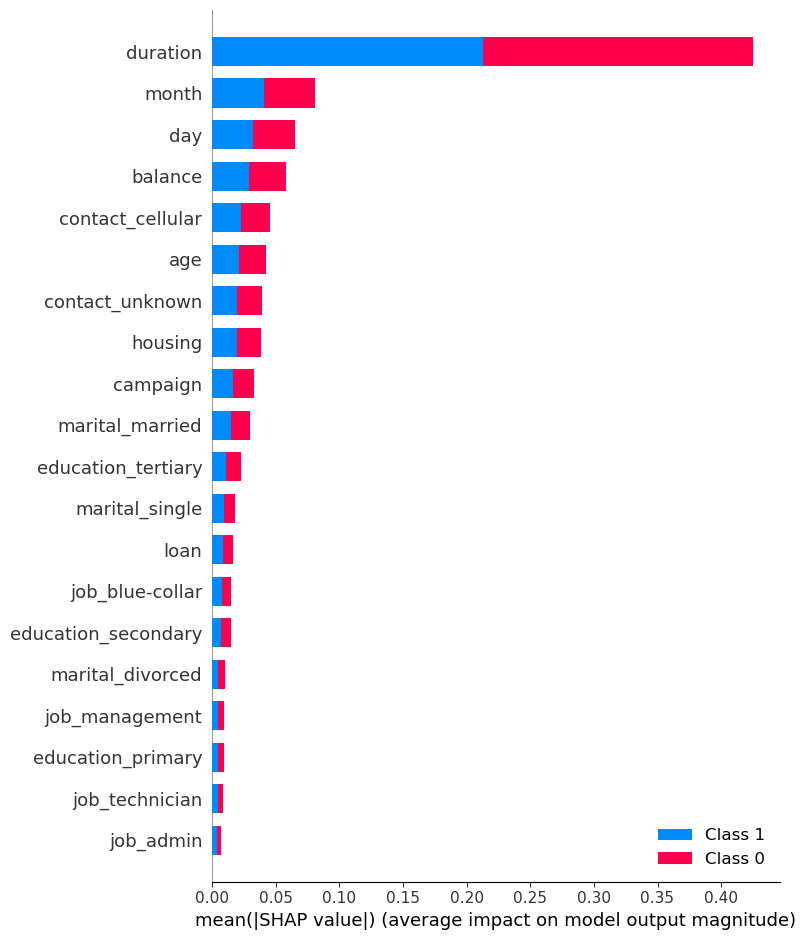

In [71]:
import shap

# Convert to DataFrames with column names
X_train_ros = pd.DataFrame(X_train_ros, columns=dataset_encoded.drop(columns=['y']).columns)
X_test = pd.DataFrame(X_test, columns=dataset_encoded.drop(columns=['y']).columns)
# create the explainer
explainer = shap.TreeExplainer(classifier, X_train_ros, n_jobs=-1)

# compute SHAP values

subset = X_test.sample(frac=0.1, random_state=1)  # Adjust frac to control the size of the subset
shap_values = explainer.shap_values(subset,check_additivity=False)
shap.summary_plot(shap_values, subset, plot_type='bar')

In [72]:
#Undersampling approach

# Randomly under sample the majority class
rus = RandomUnderSampler(random_state=42)
X_train_rus, Y_train_rus= rus.fit_resample(X_train, Y_train)
# Check the number of records after under sampling
print(sorted(Counter(Y_train_rus).items()))

[(0, 2352), (1, 2352)]


In [73]:
#After undersampling, we now have 2352 of each class--subscriber and nonsubscriber

In [74]:
#Fitting Logistic Regression to the randomly under-sampled Training set
#convert X_train, X_test back to np arrays
X_test=X_test.values

classifier_rus = LogisticRegression(max_iter=1000)
classifier_rus.fit(X_train_rus,Y_train_rus)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(classifier_rus, X_train_rus, Y_train_rus, cv=5)

# The cv_scores array will contain the accuracy for each fold
mean_cv_score = cv_scores.mean()

# Output the mean accuracy across the 5 folds
print(f'Mean CV Accuracy: {mean_cv_score * 100:.2f}%')

#Predicting the Test set results
Y_pred_rus = classifier_rus.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_rus)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred_rus))


Mean CV Accuracy: 82.72%
accuracy:0.849375
confusion matrix:
[[6363 1093]
 [ 112  432]]
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7456
           1       0.28      0.79      0.42       544

    accuracy                           0.85      8000
   macro avg       0.63      0.82      0.67      8000
weighted avg       0.94      0.85      0.88      8000



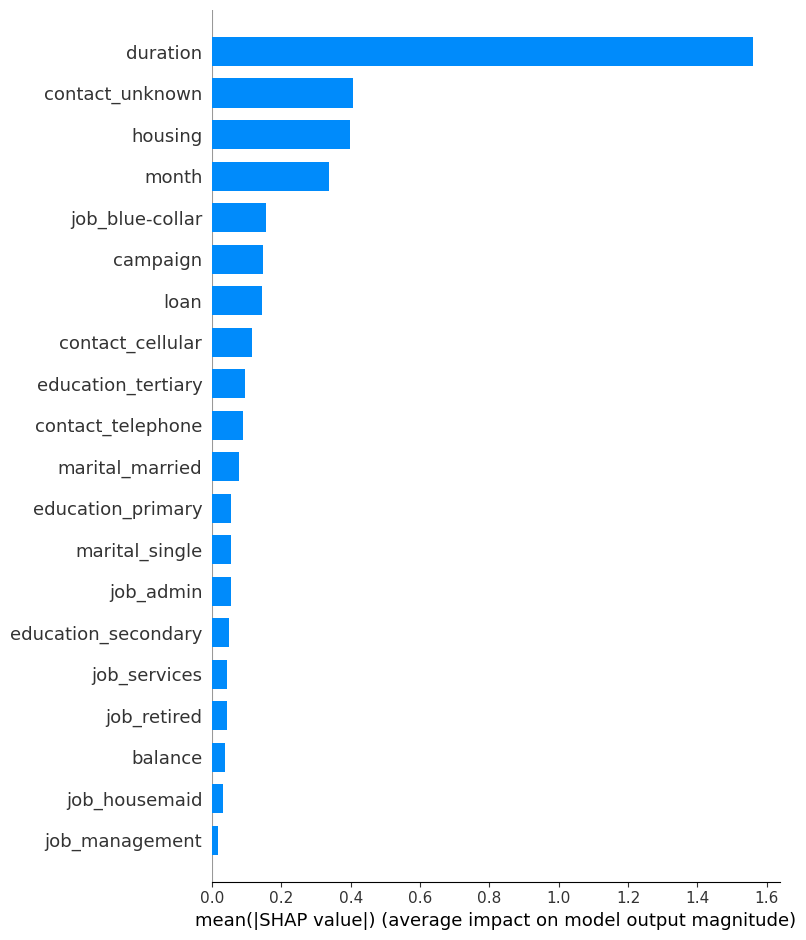

In [75]:
import shap
# Convert to DataFrames with column names
X_train_rus = pd.DataFrame(X_train_rus, columns=dataset_encoded.drop(columns=['y']).columns)
X_test = pd.DataFrame(X_test, columns=dataset_encoded.drop(columns=['y']).columns)
# create the explainer
explainer = shap.LinearExplainer(classifier_rus, X_train_rus)

# compute SHAP values
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type='bar')

In [76]:
#Perform Random Forest with undersampling
#convert X_train, X_test back to np arrays
X_train_rus=X_train_rus.values
X_test=X_test.values
#Fitting random forest classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=0)
classifier.fit(X_train_rus,Y_train_rus)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(classifier, X_train_rus, Y_train_rus, cv=5)

# The cv_scores array will contain the accuracy for each fold
mean_cv_score = cv_scores.mean()

# Output the mean accuracy across the 5 folds
print(f'Mean CV Accuracy: {mean_cv_score * 100:.2f}%')

#Predicting the Test set results
Y_pred_rf = classifier.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_rf)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,Y_pred_rf)}')

Mean CV Accuracy: 88.07%
accuracy:0.865
confusion matrix:
[[6440 1016]
 [  64  480]]
classification report:
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      7456
           1       0.32      0.88      0.47       544

    accuracy                           0.86      8000
   macro avg       0.66      0.87      0.70      8000
weighted avg       0.94      0.86      0.89      8000



In [77]:
#Both precision and recall improved

 97%|=================== | 1548/1600 [00:28<00:00]       

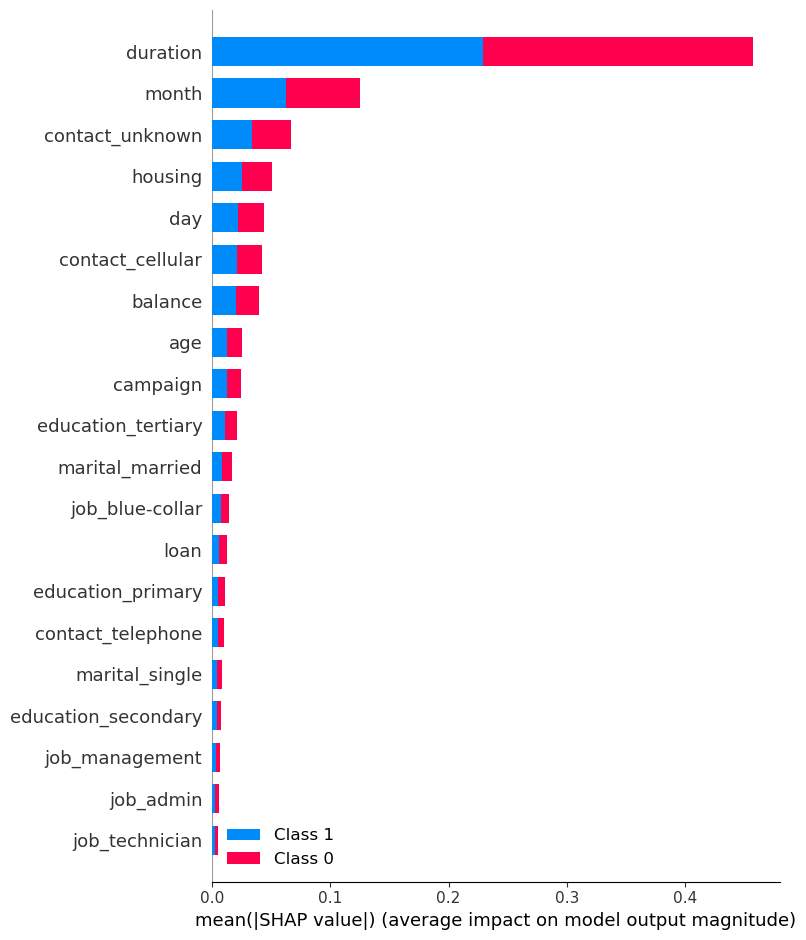

In [78]:
import shap

# Convert to DataFrames with column names
X_train_rus = pd.DataFrame(X_train_rus, columns=dataset_encoded.drop(columns=['y']).columns)
X_test = pd.DataFrame(X_test, columns=dataset_encoded.drop(columns=['y']).columns)
# create the explainer
explainer = shap.TreeExplainer(classifier, X_train_rus, n_jobs=-1)

# compute SHAP values

subset = X_test.sample(frac=0.1, random_state=1)  # Adjust frac to control the size of the subset
shap_values = explainer.shap_values(subset, check_additivity=False)
shap.summary_plot(shap_values, subset, plot_type='bar')

<AxesSubplot:title={'center':'Feature Importances'}, xlabel='Relative Importance'>

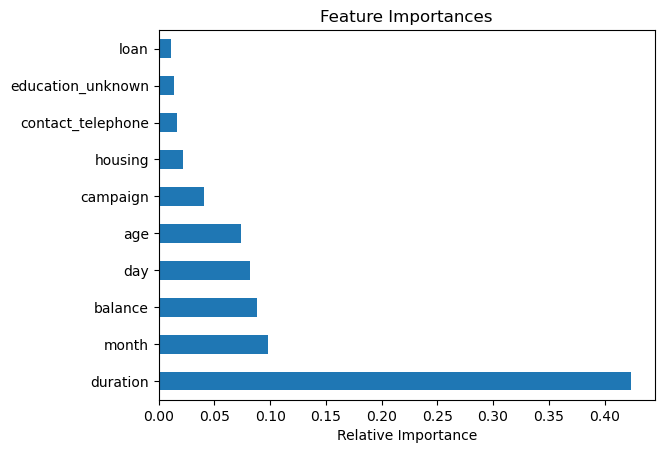

In [79]:
# get importance
importances = classifier.feature_importances_
from matplotlib import pyplot as plt
plt.title('Feature Importances')
plt.xlabel('Relative Importance')

feat_importances = pd.Series(classifier.feature_importances_, index=dataset_encoded.iloc[:,0:-1].columns)
feat_importances.nlargest(10).plot(kind='barh')

In [80]:
#According to the above, the top four features are duration, balance, day, and age.

# Perform Statistical Tests for Feature Significance

In [81]:
dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,0,395,0,0,cellular,3,jun,107,1,0
39996,30,management,single,tertiary,0,3340,0,0,cellular,3,jun,238,3,1
39997,54,admin,divorced,secondary,0,200,0,0,cellular,3,jun,170,1,1
39998,34,management,married,tertiary,0,1047,0,0,cellular,3,jun,342,1,0


In [82]:
#use chi-square test for the categorical variables job, marital, education, default, housing, loan, contact, month
import pandas as pd
from scipy.stats import chi2_contingency

# Assume dataset is your DataFrame
dataset = dataset  # Replace with your DataFrame
target_variable = 'y'  # Replace with your target column name

# List of categorical features
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']  # Replace with your list of features

# Dictionary to store results
chi2_results = {}

# Loop through each categorical feature
for feature in categorical_features:
    # Create a contingency table
    contingency_table = pd.crosstab(dataset[feature], dataset[target_variable])
    
    # Perform the Chi-Square test
    chi2_stat, p_value, dof, ex = chi2_contingency(contingency_table)
    
    # Store the results in the dictionary
    chi2_results[feature] = {
        'Chi2 Statistic': chi2_stat,
        'P-value': p_value
    }

# Now chi2_results contains the Chi2 Statistic and P-value for each feature
# Optionally, print the results
for feature, result in chi2_results.items():
    print(f"{feature}: Chi2 Statistic = {result['Chi2 Statistic']}, P-value = {result['P-value']}")



job: Chi2 Statistic = 149.75042154316787, P-value = 1.6761348063575326e-26
marital: Chi2 Statistic = 135.89809645322464, P-value = 3.091030601234065e-30
education: Chi2 Statistic = 96.67441494404031, P-value = 8.061910845440867e-21
default: Chi2 Statistic = 1.54594344848905, P-value = 0.21373529827845061
housing: Chi2 Statistic = 117.66942117763818, P-value = 2.048342664339848e-27
loan: Chi2 Statistic = 38.19687165861611, P-value = 6.395487199647575e-10
contact: Chi2 Statistic = 323.00727546041765, P-value = 7.242046790893985e-71
month: Chi2 Statistic = 1523.7066616727582, P-value = 0.0


In [83]:
#all the categorical features are significant except for default

In [84]:
#perform t-test for all numeric features
import pandas as pd
from scipy import stats

# Assume dataset is your DataFrame
dataset = dataset  # Replace with your DataFrame
target_variable = 'y'  # Replace with your target column name

# List of numerical features
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign']  # Replace with your list of features

# Dictionary to store results
t_test_results = {}

# Segregate data based on the binary target variable
group1 = dataset[dataset[target_variable] == 0]
group2 = dataset[dataset[target_variable] == 1]

# Loop through each numerical feature
for feature in numerical_features:
    # Perform the t-test
    t_statistic, p_value = stats.ttest_ind(group1[feature], group2[feature], equal_var=False)  # Assuming unequal variances
    
    # Store the results in the dictionary
    t_test_results[feature] = {
        'T-Statistic': t_statistic,
        'P-value': p_value
    }

# Now t_test_results contains the T-Statistic and P-value for each feature
# Optionally, print the results
for feature, result in t_test_results.items():
    print(f"{feature}: T-Statistic = {result['T-Statistic']}, P-value = {result['P-value']}")


age: T-Statistic = 3.5858837463147273, P-value = 0.0003408947657232658
balance: T-Statistic = -6.0061908619229705, P-value = 2.102375211208045e-09
day: T-Statistic = 1.2451450131253512, P-value = 0.213166075616706
duration: T-Statistic = -57.08290628294088, P-value = 0.0
campaign: T-Statistic = 10.929067531099468, P-value = 2.089217148426569e-27


In [85]:
#the numeric features age, balance, duration, and campaign are significant